# $$Phase - 3$$
#### Author: PARTH NAWKAR

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import cmath
from scipy.integrate import odeint
plt.rcParams["figure.figsize"]=(12,6) ##to increase graph size

## PART 1

Flow across a cylinder can be simulated by combining a free stream and a doublet at origin
So complex potential will be

$\Phi_{doublet} = \frac{\mu}{2\pi(z-z_0)} = \frac{\mu((x-x_0) -i (y-y_0))}{2\pi((x-x_0)^2+(y-y_0)^2} = \phi + i\psi$


$\Phi_{free stream} = Uz$


$\Phi = \Phi_{free stream} +\Phi_{doublet} $

$\Phi =  Uz + \frac{\mu}{2\pi z}$

For cylinder which simplifies to 

$\Phi =  U(z + \frac{R^2}{z})$

$\Phi = U(re^{i\theta}+\frac{R^2}{re^{i\theta}})$

$\Phi = U(re^{i\theta}+\frac{R^2 e^{-i\theta}}{r})$

$\frac{d\Phi}{dz} = u -iv = U(1-\frac{R^2}{z^2} )$

$ u -iv = U(1-\frac{R^2}{(re^{i\theta})^2})$

$ u -iv = U(1-\frac{R^2 (cos2\theta-isin2\theta)}{r^2})$

therefore,

$u = U(1-\frac{R^2 cos2\theta}{r^2})$

$v =U(\frac{R^2 sin2\theta}{r^2})$


by bernoullis equation pressure is given by 

$p=p_0 + \frac{1}{2}\rho (V_0^2-V^2) =p_0 + \frac{1}{2}\rho(u_0^2-u^2 + v_0^2 -v^2)   $

$ u_0 = U$

$ v_0 = 0$

$p=p_0 + \frac{1}{2}\rho (V_0^2-V^2) =p_0 + \frac{1}{2}\rho(U^2-(U(1-\frac{R^2 cos2\theta}{r^2}))^2 -(U(\frac{R^2 sin2\theta}{r^2}))^2)   $

#### now since we have given unit radius and we need pressure on the surface w eget R=r=1

$p= p_0 + \frac{1}{2}\rho U^{2} (1-4sin^{2}\theta)$

$\frac{2(p- p_0)}{\rho U^2} =1-4sin^{2}\theta$

this is Cp

$C_p = \frac{2(p- p_0)}{\rho U^2} =1-4sin^{2}\theta$

$V = (u^2 + v^2)^{\frac{1}{2}}$

Text(0, 0.5, 'velocity magnitude')

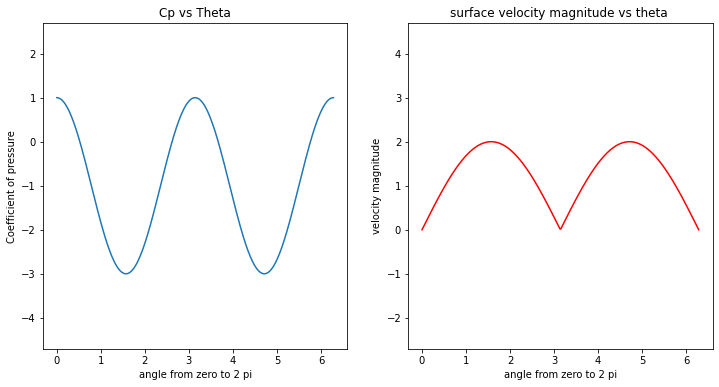

In [2]:
angles= np.mgrid[0:2*np.pi:360j]
U = 1 
c_ps = 1 -4*(np.sin(angles))**2
vel_mag = U*np.sqrt(4*np.sin(angles)**2)
plt.subplot(1,2,1)
plt.plot(angles, c_ps)
plt.axis('equal')
plt.title('Cp vs Theta')
plt.xlabel("angle from zero to 2 pi")
plt.ylabel('Coefficient of pressure')
plt.subplot(1,2,2)
plt.plot(angles, vel_mag, color= "red")
plt.axis("equal")
plt.title('surface velocity magnitude vs theta ')
plt.xlabel("angle from zero to 2 pi")
plt.ylabel("velocity magnitude")

## PART 2

now adding a point vortex at origin

$\Phi_{point vortex} = Uz$


$\Phi = \Phi_{free stream} +\Phi_{doublet} +\Phi_{point vortex} $

$\Phi =  Uz + \frac{\mu}{2\pi z} + i\frac{\Gamma}{2\pi}ln(z)   $

$\frac{d\Phi}{dz} = u -iv = U(1-\frac{R^2}{z^2} ) + i\frac{\Gamma}{2\pi z} $

$ u -iv = U(1-\frac{R^2}{(re^{i\theta})^2}) + \frac{\Gamma}{2\pi r}e^{i(\frac{\pi}{2}-\theta)}$ 

$ u -iv = U(1-\frac{R^2 (cos2\theta-isin2\theta)}{r^2}) + \frac{\Gamma}{2\pi r}(sin\theta + i cos\theta)$

therefore,

$u = U(1-\frac{R^2 cos2\theta}{r^2}) + \frac{\Gamma}{2\pi}sin\theta$

$v =U(\frac{R^2 sin2\theta}{r^2}) + \frac{\Gamma}{2\pi}cos\theta$

by bernoullis equation pressure is given by 

$p=p_0 + \frac{1}{2}\rho (V_0^2-V^2) =p_0 + \frac{1}{2}\rho(u_0^2-u^2 + v_0^2 -v^2)   $

$ u_0 = U$

$ v_0 = 0$

$p=p_0 + \frac{1}{2}\rho (V_0^2-V^2) =p_0 + \frac{1}{2}\rho(U^2-(U(1-\frac{R^2 cos2\theta}{r^2}) + \frac{\Gamma}{2\pi}sin\theta)^2 -(U(\frac{R^2 sin2\theta}{r^2}) + \frac{\Gamma}{2\pi}cos\theta)^2)   $

#### now since we have given unit radius and we need pressure on the surface w eget R=r=1 and $\Gamma = \pi/2 , \pi, 2\pi, 3\pi $

as done previously we can find Cp and velocity magnitude

### PART 3

In [103]:
U = 1
r=1
angles= np.mgrid[0:2*np.pi:360j]
x = r*np.cos(angles)
y = r*np.sin(angles)
z = x+ 1j*y

x_, y_ = np.mgrid[-5:5:200j, -2.5:2.5:200j]
z_ = x_ + 1j*y_

def phi(gamma):
    phi = np.real(U*z_ + U/z_ + 1j*gamma*np.log(z_)/(2*np.pi))
    phi[np.abs(z_) <1] =0
    return phi
def psi(gamma):
    U=1
    psi = np.imag(U*z_ + U/z_ + 1j*gamma*np.log(z_)/(2*np.pi))
    psi[np.abs(z_) <1] =0
    return psi


Text(0.5, 1.0, 'Stream function')

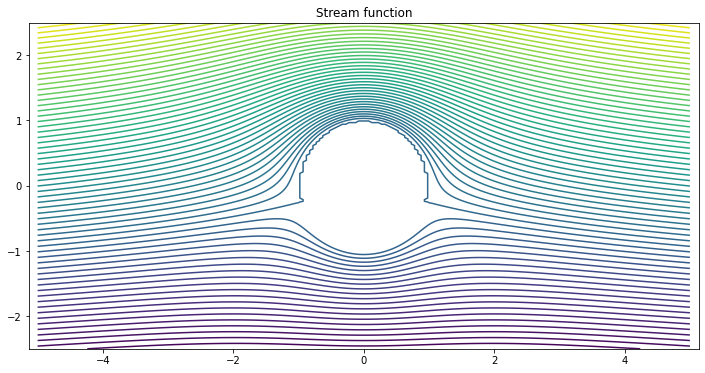

In [112]:
plt.contour(x_,y_,psi(np.pi), levels = 70)
plt.axis("equal")
plt.title("Stream function")

Text(0.5, 1.0, 'Potential function')

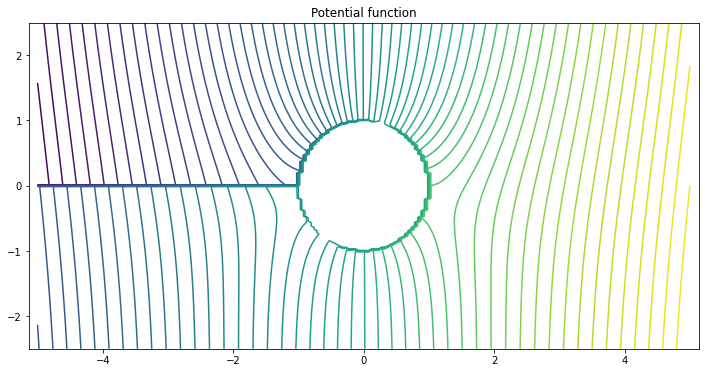

In [113]:
plt.contour(x_,y_,phi(np.pi), levels = 70)
plt.axis("equal")
plt.title("Potential function")

### PART 4

In [122]:
def u2_(gamma):
    u2_ = np.real(U*(1-1/(z_**2)) + 1j*gamma/(2*np.pi*z_))
   # u2[r < 1] =0
    return u2_
def v2_(gamma):
    v2_ = -np.imag(U*(1-1/z_**2) + 1j*gamma/(2*np.pi*z_))
    #v2[r<1]= 0
    return v2_
def mag_V_(gamma):
    return np.abs(U*(1-1/(z_**2)) + 1j*gamma/(2*np.pi*z_))

def G_Pressure_Field(gamma):
    rho = 1000
    p_minus_p0 =0.5*rho*(U**2 - mag_V_(gamma)**2)
    p_minus_p0[np.abs(z_) < 1] =0
    return p_minus_p0
    

Text(0.5, 1.0, 'gauge pressure field')

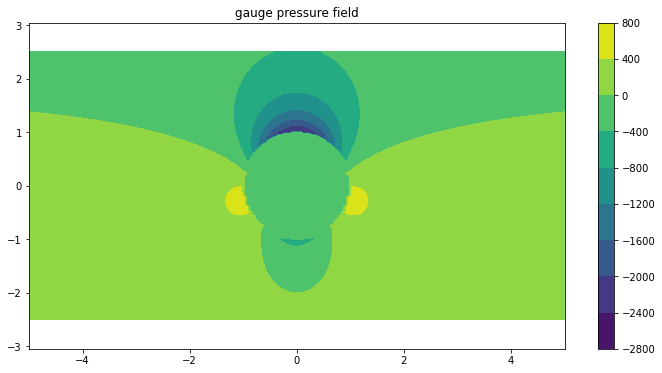

In [125]:
plt.contourf(x_,y_,G_Pressure_Field(np.pi))
plt.axis('equal')
plt.colorbar()
plt.title("gauge pressure field")

### PART 5

In [134]:



def u2(gamma):
    u2 = np.real(U*(1-1/(z**2)) + 1j*gamma/(2*np.pi*z))
   # u2[r < 1] =0
    return u2
def v2(gamma):
    v2 = -np.imag(U*(1-1/z**2) + 1j*gamma/(2*np.pi*z))
    #v2[r<1]= 0
    return v2
def mag_V(gamma):
    return np.abs(U*(1-1/(z**2)) + 1j*gamma/(2*np.pi*z))

def cp_2(gamma):
    cp_2 = (U**2 - mag_V(gamma))/U**2
    return cp_2
    

Text(0.5, 1.0, 'surface velocity magnitude  vs Theta for Gamma 2pi')

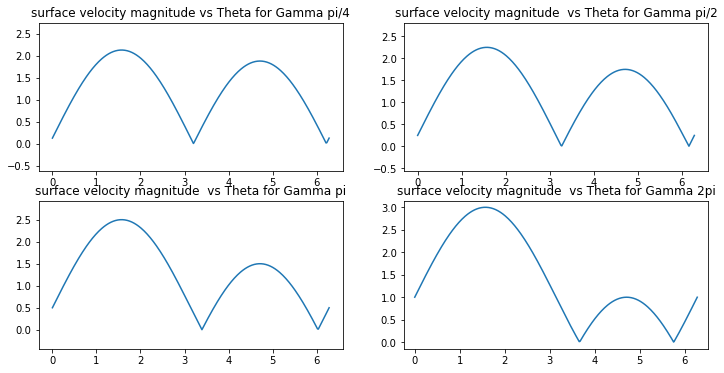

In [135]:
plt.subplot(2,2,1)
plt.plot(angles, mag_V(0.25*np.pi))
plt.axis("equal")
plt.title("surface velocity magnitude vs Theta for Gamma pi/4")
plt.subplot(2,2,2)
plt.plot(angles, mag_V(0.5*np.pi))
plt.axis("equal")
plt.title("surface velocity magnitude  vs Theta for Gamma pi/2")
plt.subplot(2,2,3)
plt.plot(angles, mag_V(1*np.pi))
plt.axis("equal")
plt.title("surface velocity magnitude  vs Theta for Gamma pi")
plt.subplot(2,2,4)
plt.plot(angles, mag_V(2*np.pi))
plt.axis("equal")
plt.title("surface velocity magnitude  vs Theta for Gamma 2pi")

### PART 6

Text(0.5, 1.0, 'CP vs Theta for Gamma 2pi')

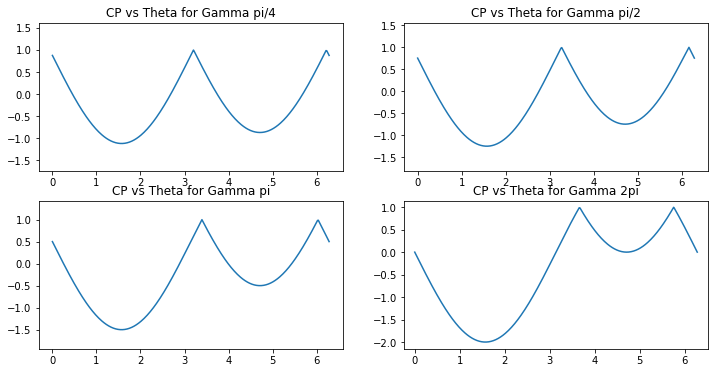

In [136]:
plt.subplot(2,2,1)
plt.plot(angles, cp_2(0.25*np.pi))
plt.axis("equal")
plt.title("CP vs Theta for Gamma pi/4")
plt.subplot(2,2,2)
plt.plot(angles, cp_2(0.5*np.pi))
plt.axis("equal")
plt.title("CP vs Theta for Gamma pi/2")
plt.subplot(2,2,3)
plt.plot(angles, cp_2(np.pi))
plt.axis("equal")
plt.title("CP vs Theta for Gamma pi")
plt.subplot(2,2,4)
plt.plot(angles, cp_2(2*np.pi))
plt.axis("equal")
plt.title("CP vs Theta for Gamma 2pi")

### PART 7


In [157]:


def T_drag(gamma):
    rho = 1000
    drag = cp_2(gamma)*(0.5*rho*U**2)*(2*np.pi*1/360)*np.cos(angles)
    return np.sum(drag)

def T_lift(gamma):
    rho = 1000
    lift = cp_2(gamma)*(0.5*rho*U**2)*(2*np.pi*1/360)*np.sin(angles)
    return np.sum(lift)

In [158]:
T_lift(-np.pi)

986.7370035509766

In [159]:
T_drag(-np.pi)

4.30973775850984

while integrating this cp function the sin component corresponds to lift and the cos component corresponds to drag.
dividing the angles in 360 parts and itegrating using mid point rule we get lift and drag.